### Generic usage imports

In [73]:
import csv
import functools as ft
import math as m
import re
from io import StringIO

import numpy as np
import pandas as pd
import requests

### Graphical libraries imports

In [74]:
import matplotlib as mp
import matplotlib.pyplot as plt

### NN oriented imports

In [80]:
from keras.layers import Conv2D, Dense, Flatten, Embedding
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm_notebook as tqdm

In [78]:
tqdm.pandas()
url_train_dev = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTOZ2rC82rhNsJduoyKYTsVeH6ukd7Bpxvxn_afOibn3R-eadZGXu82eCU9IRpl4CK_gefEGsYrA_oM/pub?gid=1863430984&single=true&output=tsv'
url_test = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT-KNR9nuYatLkSbzSRgpz6Ku1n4TN4w6kKmFLkA6QJHTfQzmX0puBsLF7PAAQJQAxUpgruDd_RRgK7/pub?gid=417546901&single=true&output=tsv'

## Classes and functions
### Dataset download function
Since to retrieve a dataset there is only one function employed, it's useless to build a whole class!

In [79]:
def fetch(url, columns):
    r = requests.get(url)
    data = r.content.decode('utf8')
    df = pd.read_csv(StringIO(data), sep='\t')
    df.columns = columns
    return df

### Data-cleaning class

In [23]:
class Raccoon:
    def __init__(self):
        self.to_strip = re.compile(
            "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "]+",
            flags=re.UNICODE)
    def remove_nonalpha_chars(self, df, columns):
        df_out = df.copy(deep=True)
        for column in columns:
            df_out[column] = df_out[column].progress_apply(lambda row: self.to_strip.sub(r'', row))
        return df_out
    def remove_links(self, df, columns):
        df_out = df.copy(deep=True)
        for column in columns:
            df_out[column] = df_out[column].progress_apply(lambda row: re.sub(r'http\S+', '', row))
        return df_out
    def lower_casing(self, df, columns):
        df_out = df.copy(deep=True)
        for column in columns:
            df_out[column] = df_out[column].progress_apply(lambda row: row.lower())
        return df_out 
    def remove_stopwords(self, df, columns):
        df_out = df.copy(deep=True)
        for column in columns:
            df_out[column] = df_out[column].progress_apply(lambda x: ' '.join([word for word in (x.split()) if word not in (stop) and len(word) != 1]))
        return df_out 

### Average and median tweet length function

In [46]:
def AvgMedianLen(x):
    df = {}
    df['mean_character_count'] = x['tweet'].str.len().mean()
    df['mean_word_count'] = x['tweet'].str.split().str.len().mean()
    return(pd.Series(df, index=['mean_character_count', 'mean_word_count']))

### Model building class

In [71]:
class CNNModel:
    def __init__(self, embeddings):
        self.embedding = embeddings
    def instantiate_model(self, kersize, activation):
        model = model_type
        #add model layers
        model.add(Conv2D(64, kernel_size=kersize, activation=’relu’, input_shape=(28,28,1)))
        model.add(Conv2D(32, kernel_size=kerzise, activation=’relu’))
        model.add(Flatten())
        model.add(Dense(10, activation=’softmax’))

### Fetching data

In [24]:
df_train = fetch(url_train_dev, ["tweet", "label"])
df_test = fetch(url_test, ["tweet", "label"])

In [81]:
df_train.head()

,tweet,label
0,يا من أناديها ويخنقني البكاء ويكاد صمت الدمع ...,ar
1,فيه فرق بين اهل غزة اللى مطحونين من ناحيتين وب...,ar
2,ﻋﻦ ﺍﻟﻠﺤﻈﺔ اﻟﺤﻠﻮﺓﺓ ﺍﻟﻠﻲ ﺑﺘﻐﻤﺾ ﻓﻴﻬﺎ ﻋﻴﻨﻴﻚ ﺑﺘﻔﻜﺮ ...,ar
3,يا ابو سلو عرفتني,ar
4,ب50 ريال أكفل معتمر في رمضان ، ولك بإذن الله م...,ar


### Chinese and japanese text cannot be tokenized by normal means
Should employ other techniques like using jieba for chinese and other libraries

In [109]:
import jieba

In [115]:
#jieba.lcut((df_train.loc[df_train['label'] == "zh-CN"]).iloc[1][0])
#set([i for i in df_train["label"]])
df_train.loc[df_train['label'] == "ja"].iloc[0][0].split()

['@drm821', '明日の本番、どうなっているか、ツイートにご期待ください…！！']

### Cleaning data

In [26]:
rac = Raccoon()

In [34]:
train = (rac.remove_nonalpha_chars(df_train, ["tweet"]))#.head()
test = (rac.remove_nonalpha_chars(df_test, ["tweet"]))#.head()

In [35]:
train = rac.remove_links(train, ["tweet"])
test = rac.remove_links(test, ["tweet"])

In [59]:
train = rac.lower_casing(train, ["tweet"])
test = rac.lower_casing(test, ["tweet"])

### Data analysis

### Distribution analysis
1) Mean <br>
2) Median <br>
3) Variance <br>
4) Std. Deviation

In [60]:
train_len = train.label.count()
train_freq = list(train.label.value_counts().to_dict().items())

In [61]:
mean = np.mean([x[1] for x in train_freq])
median = np.median([x[1] for x in train_freq])
variance = np.var([x[1] for x in train_freq])
stdev = m.sqrt(variance)

In [62]:
print("Mean: {0}\nMedian: {1}".format(mean, median))
print("Variance: {0}\nStdev: {1}".format(variance, stdev))

Mean: 763.4057971014493
Median: 11.0
Variance: 7128528.849821464
Stdev: 2669.9304953165847


**Observation**:

There are languanges with very many tweets and some languages with only one tweet. The small sample size for some languages will make it difficult for the model to identify them well.

#### Average and median tweet length by language

In [63]:
df_train_dev_agg = train.groupby(by="label").apply(AvgMedianLen)
df_train_dev_agg.head()

,mean_character_count,mean_word_count
label,,
ar,73.548886,12.737608
ar_LATN,31.166667,5.500000
az,88.000000,9.000000
bg,63.000000,10.000000
bn,87.000000,13.250000


#### Scatter plot with average count and average word per tweet per language
##### TODO: Evaluate if this part is to be kept

Each point in the plot below represents a language label. <br>
The points are laid out in 2D based on the average number of words and average number of characters per tweet. <br>
It looks like, that one can discriminate between languages based on these metrics. <br>
Otherwise, all points/languages would clump together. <br>
Hence, I will add the average number of character and the average number of words as new features to the data set.

Text(0.5, 1.0, 'Avg character count and avg word per tweet per language')

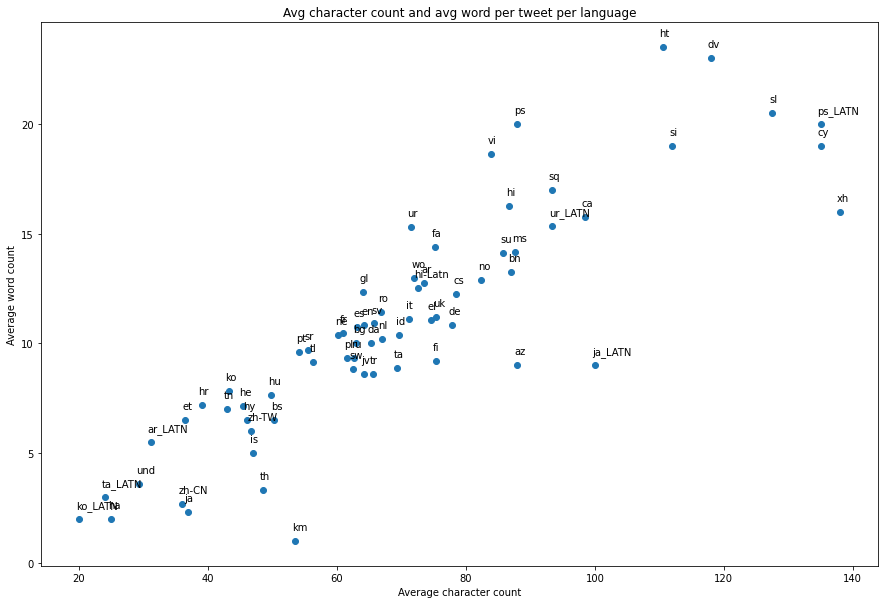

In [64]:
mp.pyplot.figure(figsize=(15,10))
mp.pyplot.scatter(x= df_train_dev_agg['mean_character_count'], y= df_train_dev_agg['mean_word_count'])

for i in range(len(df_train_dev_agg['mean_word_count'])):
    t = (df_train_dev_agg.iloc[i]['mean_character_count'], df_train_dev_agg.iloc[i]['mean_word_count'])
    mp.pyplot.annotate(df_train_dev_agg.index.values[i], t, (t[0]-0.5, t[1]+0.5))

mp.pyplot.xlabel("Average character count")
mp.pyplot.ylabel("Average word count")
mp.pyplot.title("Avg character count and avg word per tweet per language")

#### Number of tweets per language

In [65]:
train_grouped = train.groupby(by = ["label"]).count().sort_values(by= ["tweet"], ascending = False)
unique_labels = train.label.unique()
train_grouped

,tweet
label,
en,18508
ja,10421
es,5930
und,4537
id,3006
...,...
tn,1
dv,1
ta_LATN,1


**Observation:**

It seems unlikely to learn anything from tweets with scarce language occurences, so it could be wise to reassign those tweets as "und" (undefined). <br>
Since 10-fold cross validation is in use, all the languages with less than 10 tweets are labelled as "und". <br>

In [66]:
dropped_lang = train_grouped[train_grouped["tweet"] < 10].index

for i in range(len(train)):
    if train.iloc[i]["label"] in dropped_lang:
        train.iloc[i]["label"] = "und"

In [67]:
dropped_lang

Index(['ta', 'sq', 'bn', 'ur', 'da', 'sw', 'hr', 'ne', 'bs', 'cs', 'gl', 'bg',
       'et', 'km', 'hy', 'ht', 'sl', 'ps', 'az', 'xh', 'wo', 'ja_LATN', 'is',
       'ha', 'ps_LATN', 'cy', 'tn', 'dv', 'ta_LATN', 'si', 'ko_LATN'],
      dtype='object', name='label')

In [68]:
X_train = train['tweet']
y_train = train['label']
X_test = test['tweet']
y_test = test['label']

In [69]:
# change any y_test labels which are not in x_test to category "<unknown>"
unknown_labels = np.setdiff1d(y_test, y_train)

i = 0
for l in y_test:
    for ul in unknown_labels:
        if l == ul:
            y_test[i] = "und"
    i += 1

In [70]:
len(np.setdiff1d(y_test, y_train))

0

#### Usage of Validation data

# CNN IDEA
## For each tweet, tokenize the words.
## For each word, create a 50+ dimensional embedding
## Compact into a matrix and treat said matrix as an "image" to convolute on

# Tokenization problem
#### How do we tokenize chinese and japanese tweets?